In [26]:
from dataset_loader import H36M

import matplotlib.pyplot as plt 
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
dataset = H36M(mode='val', num_images=1280)

In [101]:
struct = {}

for scen_name in pkl:
    scen = pkl[scen_name]
    struct[scen_name] = {'total':0}
    for subj_name in scen:
        subj = scen[subj_name]
        struct[scen_name][subj_name] = {'total':0, '#s':[]}
        for cam_name in subj:
            cam = subj[cam_name]
            struct[scen_name][subj_name]['#s'].append(len(cam))
        struct[scen_name][subj_name]['total'] = sum(struct[scen_name][subj_name]['#s'])
        struct[scen_name]['total'] += struct[scen_name][subj_name]['total']


In [103]:
for scen_name in pkl:
    print(scen_name, struct[scen_name]['total'])
    for subj_name in pkl[scen_name]:
        print(subj_name, struct[scen_name][subj_name]['total'])

Directions 100936
1 11980
5 28160
6 22648
7 21992
8 16156
Discussion 158788
1 30628
5 48100
6 20540
7 43540
8 15980
Eating 109403
1 20312
5 22428
6 16930
7 27736
8 21997
Greeting 72429
1 9656
5 18685
6 14404
7 17504
8 12180
Phoning 115528
1 19600
5 21184
6 17835
7 31757
8 25152
Posing 69427
1 8636
5 16520
6 9239
7 21044
8 13988
Purchases 62982
1 8884
5 22332
6 10849
7 11056
8 9861
Sitting 116020
1 23664
5 30934
6 15260
7 29310
8 16852
SittingDown 122793
1 22882
5 35359
6 12983
7 39360
8 12209
Smoking 133220
1 20356
5 26488
6 24264
7 37052
8 25060
Waiting 115257
1 12928
5 37467
6 17436
7 34118
8 13308
Walking 132695
1 26411
5 22084
6 25436
7 29036
8 29728
WalkingDog 79083
1 13744
5 16168
6 14180
7 21475
8 13516
WalkTogether 87327
1 10019
5 24000
6 12876
7 21000
8 19432


In [22]:
from time import time

start = time()
dataset = H36M(num_images=10000, mode='train')
print(time() - start)

20.290101289749146


In [23]:
batch_size = 1

In [26]:
import torch as th
datasetloader = th.utils.data.DataLoader(dataset, batch_size=batch_size, 
                shuffle=shuffle, num_workers=5)

NameError: name 'shuffle' is not defined

In [19]:
list(h36m.pkl['Directions'][7].keys())

['Directions_1.54138969',
 'Directions_1.55011271',
 'Directions_1.58860488',
 'Directions_1.60457274',
 'Directions.54138969',
 'Directions.55011271',
 'Directions.58860488',
 'Directions.60457274']

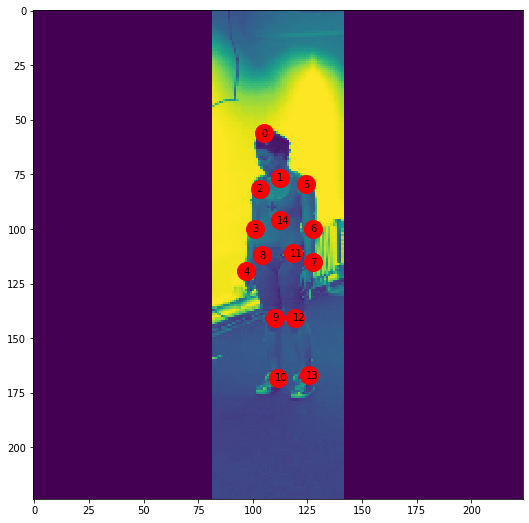

In [3]:
# 1237 - pretty nice ex
image, annot_2d = h36m[1237]

fig,ax = plt.subplots(1, figsize=(9,9))
plt.imshow(image.permute(1,2,0).mean(dim=2))

plt.plot(annot_2d[:,0], annot_2d[:,1], 'ro', markersize=18)
for i, joint in enumerate(annot_2d):
    
    plt.annotate(i, (float(joint[0]), float(joint[1])), 
                 xytext=(-3,-3), textcoords='offset points')


In [7]:
from dataset_loader import MPII
import torch as th

In [8]:
mpii = MPII(mode='val')

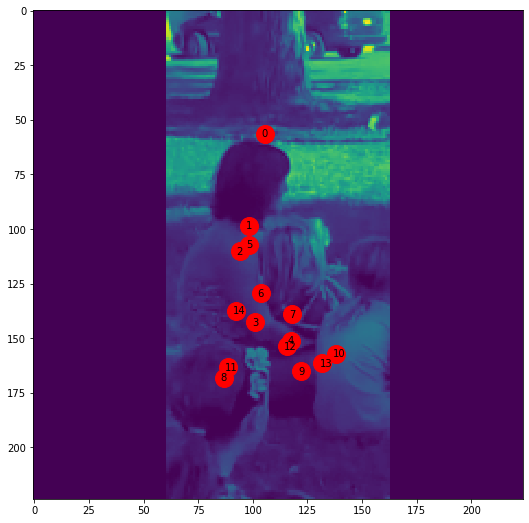

In [9]:
image, annot_2d, joints_valid = mpii[990]

joints_names = th.arange(15)[joints_valid]

fig,ax = plt.subplots(1, figsize=(9,9))
ax.imshow(image.permute(1,2,0).mean(dim=2))

ax.plot(annot_2d[:,0], annot_2d[:,1], 'ro', markersize=18)
for i, joint in enumerate(annot_2d):
    ax.annotate(str(int(joints_names[i])), (float(joint[0]), float(joint[1])), 
                xytext=(-3,-3), textcoords='offset points')


In [22]:
from dataset_loader import MPII, H36M

In [ ]:
from torch.utils.data import DataLoader

mpii1 = MPII(num_images=200)
data_loader1 = DataLoader(mpii1, batch_size=5, shuffle=False)

In [62]:
h36m = H36M(num_images=1000)
data_loader2 = DataLoader(h36m, batch_size=2, shuffle=False)

In [64]:
h36m[0][2]

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True])

In [52]:
counter = 0
for x, y in zip(data_loader1, data_loader2):
    print(x[0].size(), y[2].size())
    break
#     idx = 2
#     plt.imshow(x[0][idx].permute(1,2,0))
#     joints = x[1][idx][x[2][idx]]
#     plt.plot(joints[:,0], joints[:,1], 'r.')
#     plt.show()
#     counter += 1
    
#     if counter > 10:
#         break

torch.Size([5, 3, 224, 224]) torch.Size([2, 15])


In [66]:
th.tensor([0,0]).view(1,2)

tensor([[0, 0]])